# Heart Diease Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Reading the data from the file

In [3]:
df=pd.read_csv("heart.csv")

In [4]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [7]:
df.shape

(918, 12)

In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [12]:
df.drop(columns=['ExerciseAngina','Oldpeak','ST_Slope'],inplace=True)

In [13]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,0
1,49,F,NAP,160,180,0,Normal,156,1
2,37,M,ATA,130,283,0,ST,98,0
3,48,F,ASY,138,214,0,Normal,108,1
4,54,M,NAP,150,195,0,Normal,122,0
...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,1
914,68,M,ASY,144,193,1,Normal,141,1
915,57,M,ASY,130,131,0,Normal,115,1
916,57,F,ATA,130,236,0,LVH,174,1


In [14]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [15]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [16]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [17]:
df['FastingBS'].unique()

array([0, 1], dtype=int64)

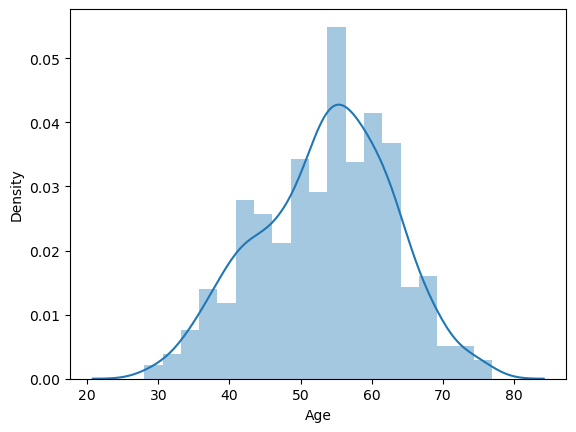

In [18]:
sns.distplot(df['Age'])
plt.show()

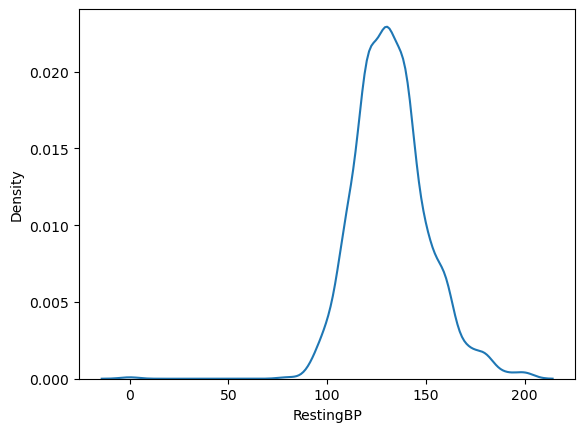

In [19]:
sns.distplot(df['RestingBP'],hist=False)

plt.show()

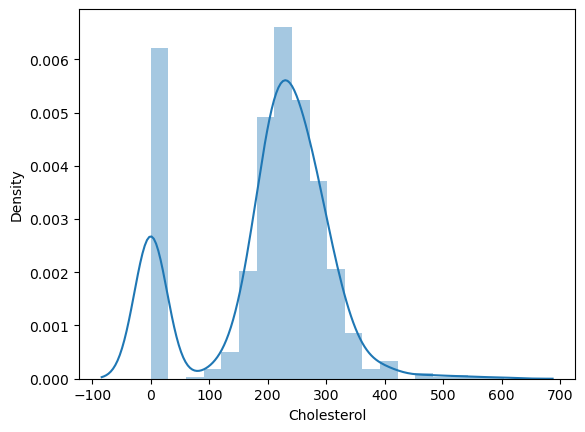

In [20]:
sns.distplot(df['Cholesterol'],bins=20)
plt.show()

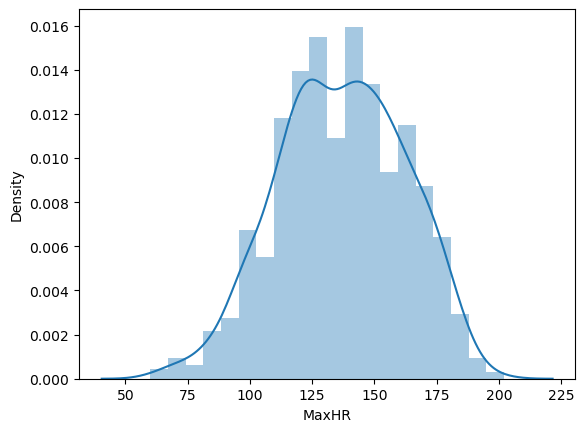

In [21]:
sns.distplot(df['MaxHR'])
plt.show()

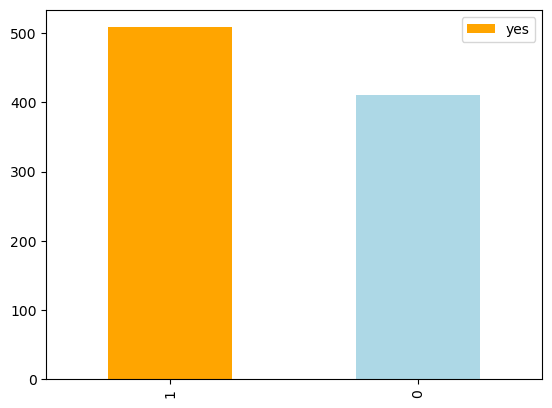

In [22]:
df['HeartDisease'].value_counts().plot(kind='bar',color=['orange','lightblue'])
plt.legend(['yes','no'])
plt.show()

<Axes: >

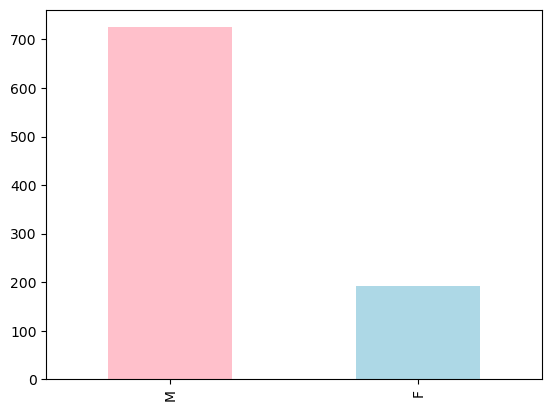

In [23]:
df['Sex'].value_counts().plot(kind='bar',color=['pink','lightblue'])

# Data Preprocessing

Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
encoder=LabelEncoder()

In [26]:
df['Sex']=encoder.fit_transform(df.Sex)
df['ChestPainType']=encoder.fit_transform(df.ChestPainType)
df['RestingECG']=encoder.fit_transform(df.RestingECG)

#sex  M --> 1   F --> 0

ChestPainType

 1.'ATA' :1

 2.'NAP' :2

 3.'ASY' :0

 4.'TA' :3

RestingECG

 1.Normal  :1

 2.ST  :2

 3.LVH  :0

In [27]:
df=df[df['Cholesterol']<500]

In [28]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,HeartDisease
0,40,1,1,140,289,0,1,172,0
1,49,0,2,160,180,0,1,156,1
2,37,1,1,130,283,0,2,98,0
3,48,0,0,138,214,0,1,108,1
4,54,1,2,150,195,0,1,122,0
...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,1
914,68,1,0,144,193,1,1,141,1
915,57,1,0,130,131,0,1,115,1
916,57,0,1,130,236,0,0,174,1


Standarization

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
columns=['RestingBP','Cholesterol','MaxHR']
df[columns]=scaler.fit_transform(df[columns])

In [30]:
x=df.iloc[:,:8].values
y=df.iloc[:,8].values

In [31]:
x

array([[40.        ,  1.        ,  1.        , ...,  0.        ,
         1.        ,  1.38071058],
       [49.        ,  0.        ,  2.        , ...,  0.        ,
         1.        ,  0.75290412],
       [37.        ,  1.        ,  1.        , ...,  0.        ,
         2.        , -1.52289432],
       ...,
       [57.        ,  1.        ,  0.        , ...,  0.        ,
         1.        , -0.85584995],
       [57.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  1.45918639],
       [38.        ,  1.        ,  2.        , ...,  0.        ,
         1.        ,  1.41994849]])

In [32]:
y

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [33]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15)

In [35]:
x_train.shape,y_train.shape

((731, 8), (731,))

In [36]:
x_test.shape,y_test.shape

((183, 8), (183,))

# Logistic Regression

In [37]:
model=LogisticRegression()

In [38]:
model.fit(x_train,y_train)

LogisticRegression()

In [39]:
y_pred=model.predict(x_test)
score=accuracy_score(y_test,y_pred)*100

In [40]:
print("accuracyscore:",score)

accuracyscore: 83.60655737704919


In [48]:
score=cross_val_score(model,x,y,cv=20)
print("crossval score:",round(np.mean(score)*100,2))

crossval score: 76.14


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# KNeighbors Classifer

In [62]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,y_train)
y_predknn=knn.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,y_predknn)*100)

accuracy score:  80.87431693989072


In [63]:
score=cross_val_score(knn,x,y,cv=15)
print("cross val score : ",round(np.mean(score)*100,2))

cross val score :  72.87


# RandomForest Classifer

In [59]:
randomforest=RandomForestClassifier(n_estimators=13,random_state=14)
randomforest.fit(x_train,y_train)
y_predrfc=randomforest.predict(x_test)
print("accuracy score : ",accuracy_score(y_test,y_predrfc)*100)

accuracy score :  84.69945355191257


In [60]:
score=cross_val_score(randomforest,x,y,cv=15)
print("cross val score : ",round(np.mean(score)*100,2))

cross val score :  77.9


# DecisionTree Classifier

In [55]:
decisiontree=DecisionTreeClassifier(random_state=48)
decisiontree.fit(x_train,y_train)
y_preddtc=decisiontree.predict(x_test)
print("accuracy score : ",accuracy_score(y_test,y_preddtc)*100)

accuracy score :  73.224043715847


In [57]:
score=cross_val_score(decisiontree,x,y,cv=15)
print("cross val score",round(np.mean(score)*100,2))

cross val score 71.34
